<a href="https://colab.research.google.com/github/Balaji91221/apartments_for_rent_classified/blob/main/Ganesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First, let's inspect the uploaded file to understand its structure and content.
import pandas as pd

# Load the dataset
file_path = 'apartments_for_rent_classified_10K.csv'

In [2]:
# The first step in cleaning the data is to split the columns correctly
# It seems that columns are separated by semicolons (;) based on the data preview

# Re-load the dataset with the correct separator ';'
data_cleaned = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')

# Now, let's display the first few rows to see how it looks
data_cleaned.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


<ipython-input-3-6c7327c1d15e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['price_numeric'] = data_cleaned['price_display'].replace('[\$,]', '', regex=True).astype(float)


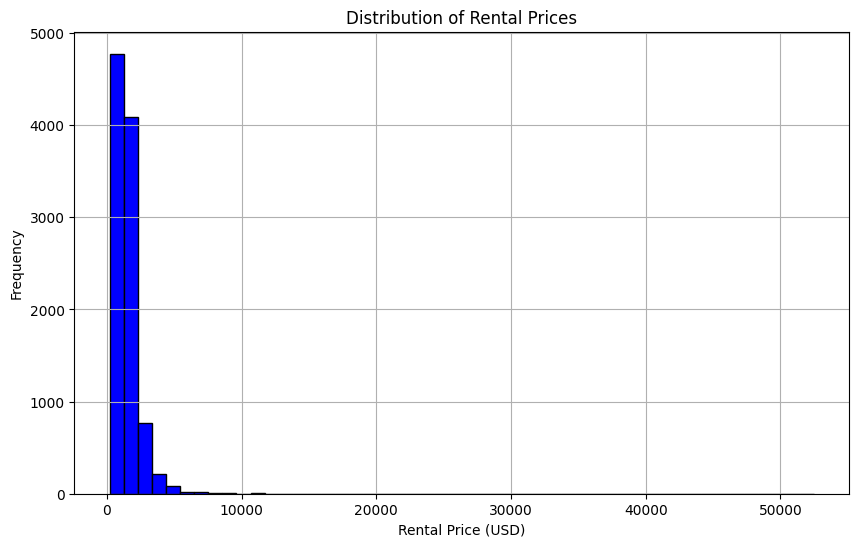

In [3]:
import matplotlib.pyplot as plt
# Let's address the specific issue where certain price values include terms like 'Weekly' which are preventing the conversion to float.
# We'll clean the 'price_display' column to retain only rows with numeric price information in USD.

## Clean up 'price_display' column, retaining only rows where the price is purely numeric
data_cleaned = data_cleaned[data_cleaned['price_display'].str.contains('^\$[\d,]+$', regex=True)]

# Convert 'price_display' to numeric for analysis (remove $ and commas)
data_cleaned['price_numeric'] = data_cleaned['price_display'].replace('[\$,]', '', regex=True).astype(float)

# 1. Distribution of rental prices
plt.figure(figsize=(10,6))
plt.hist(data_cleaned['price_numeric'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Rental Prices')
plt.xlabel('Rental Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


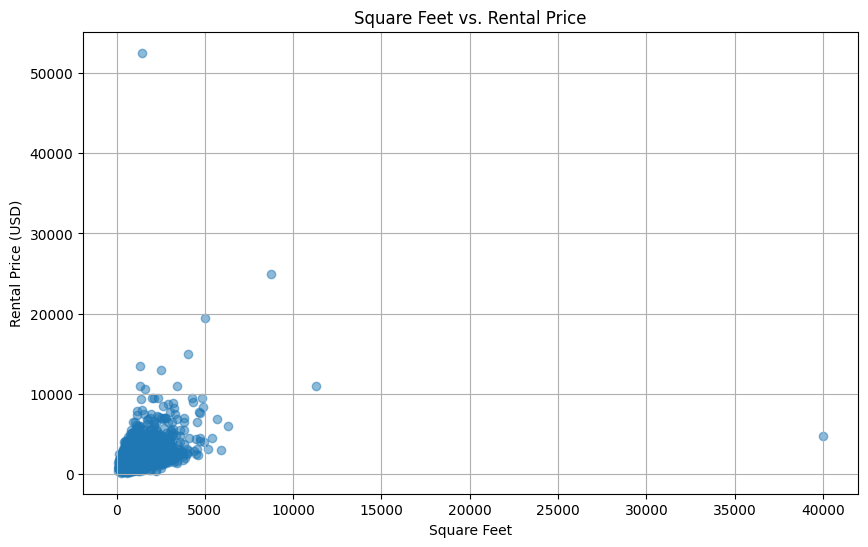

In [4]:

# 2. Scatter plot of Square Feet vs. Rental Price
plt.figure(figsize=(10,6))
plt.scatter(data_cleaned['square_feet'], data_cleaned['price_numeric'], alpha=0.5)
plt.title('Square Feet vs. Rental Price')
plt.xlabel('Square Feet')
plt.ylabel('Rental Price (USD)')
plt.grid(True)
plt.show()

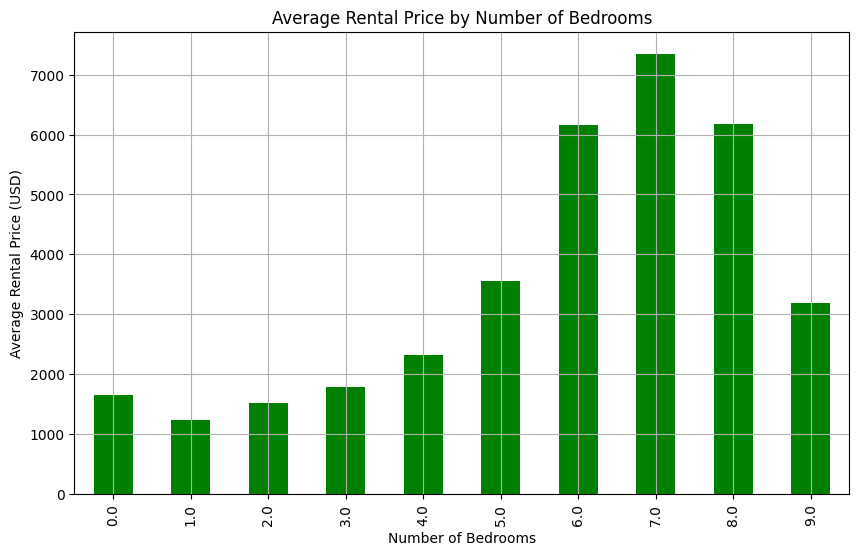

In [5]:

# 3. Average rental price by number of bedrooms
avg_price_by_bedrooms = data_cleaned.groupby('bedrooms')['price_numeric'].mean()

plt.figure(figsize=(10,6))
avg_price_by_bedrooms.plot(kind='bar', color='green')
plt.title('Average Rental Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rental Price (USD)')
plt.grid(True)
plt.show()

In [6]:
# Feature Engineering

# 1. Create a new feature: price per square foot
data_cleaned['price_per_sqft'] = data_cleaned['price_numeric'] / data_cleaned['square_feet']

# 2. Handling categorical variables: One-hot encoding for 'cityname' and 'state'
data_cleaned = pd.get_dummies(data_cleaned, columns=['cityname', 'state'], drop_first=True)

# 3. Handle any remaining missing values by dropping or imputing (for simplicity, we'll drop any remaining rows with missing values)
data_cleaned = data_cleaned.dropna()

# Display the updated dataset with the new features
data_cleaned.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
16,5654898031,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,...,False,False,False,False,False,False,False,False,False,False
40,5668625234,housing/rent/apartment,Studio apartment 420 W. Fullerton Pkwy,"This unit is located at 420 W. Fullerton Pkwy,...","Cable or Satellite,Dishwasher,Internet Access,...",1.0,1.0,USD,No,Thumbnail,...,False,False,False,False,False,False,False,False,False,False
46,5668612110,housing/rent/apartment,Studio apartment 925 Geary Street,"This unit is located at 925 Geary Street, San ...","Dishwasher,Refrigerator",1.0,0.0,USD,No,Thumbnail,...,False,False,False,False,False,False,False,False,False,False
50,5668620457,housing/rent/apartment,Studio apartment 3321 Eureka St,"This unit is located at 3321 Eureka St, Anchor...",Dishwasher,1.0,1.0,USD,No,Thumbnail,...,False,False,False,False,False,False,False,False,False,False
146,5668620019,housing/rent/apartment,Studio apartment 4117 University Ave,"This unit is located at 4117 University Ave, C...","Internet Access,Parking,Refrigerator",1.0,0.0,USD,No,Thumbnail,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Drop any columns that are not numerical or already encoded properly
# We will remove text-based and identifier columns that are not useful for modeling

columns_to_drop = ['id', 'category', 'title', 'body', 'amenities', 'currency', 'fee', 'has_photo',
                   'pets_allowed', 'price_display', 'address', 'source', 'time']

# Drop the non-numeric columns
X_cleaned = data_cleaned.drop(columns=columns_to_drop)

# Ensure all categorical variables are one-hot encoded and remove any remaining non-numeric data
X_cleaned = pd.get_dummies(X_cleaned, drop_first=True)

# Verify the structure of the cleaned data
X_cleaned.dtypes.unique(), X_cleaned.head()


(array([dtype('float64'), dtype('int64'), dtype('bool')], dtype=object),
      bathrooms  bedrooms  price  square_feet  latitude  longitude  \
 16         1.0       1.0   1560          200   35.0960   -77.0272   
 40         1.0       1.0    942          225   41.8625   -87.6825   
 46         1.0       0.0   1695          232   37.7599  -122.4379   
 50         1.0       1.0    705          245   61.1723  -149.8414   
 146        1.0       0.0    695          250   42.5286   -92.4509   
 
      price_numeric  price_per_sqft  cityname_Abilene  cityname_Abingdon  ...  \
 16          1560.0        7.800000             False              False  ...   
 40           942.0        4.186667             False              False  ...   
 46          1695.0        7.306034             False              False  ...   
 50           705.0        2.877551             False              False  ...   
 146          695.0        2.780000             False              False  ...   
 
      state_SD  s

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define feature matrix (X) and target variable (y)
X = X_cleaned.drop(columns=['price_numeric'])  # Assuming 'price_numeric' is the target column
y = data_cleaned['price_numeric']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models and evaluate
linear_model = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
print(f"Linear Regression -> MAE: {mae_linear:.2f}, RMSE: {rmse_linear:.2f}, R²: {r2_linear:.2f}")

Linear Regression -> MAE: 0.00, RMSE: 0.00, R²: 1.00


In [9]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)
print(f"Ridge Regression -> MAE: {mae_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.2f}")

Ridge Regression -> MAE: 0.00, RMSE: 0.00, R²: 1.00


In [10]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)
mae_gbm, rmse_gbm, r2_gbm = evaluate_model(y_test, y_pred_gbm)
print(f"GBM -> MAE: {mae_gbm:.2f}, RMSE: {rmse_gbm:.2f}, R²: {r2_gbm:.2f}")

GBM -> MAE: 19.47, RMSE: 381.45, R²: 0.85


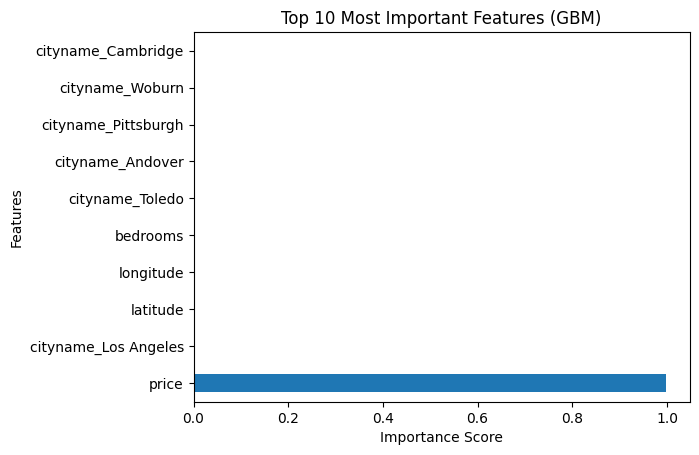

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
feature_importances = pd.Series(gbm_model.feature_importances_, index=X.columns)

# Plot the top 10 most important features
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features (GBM)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


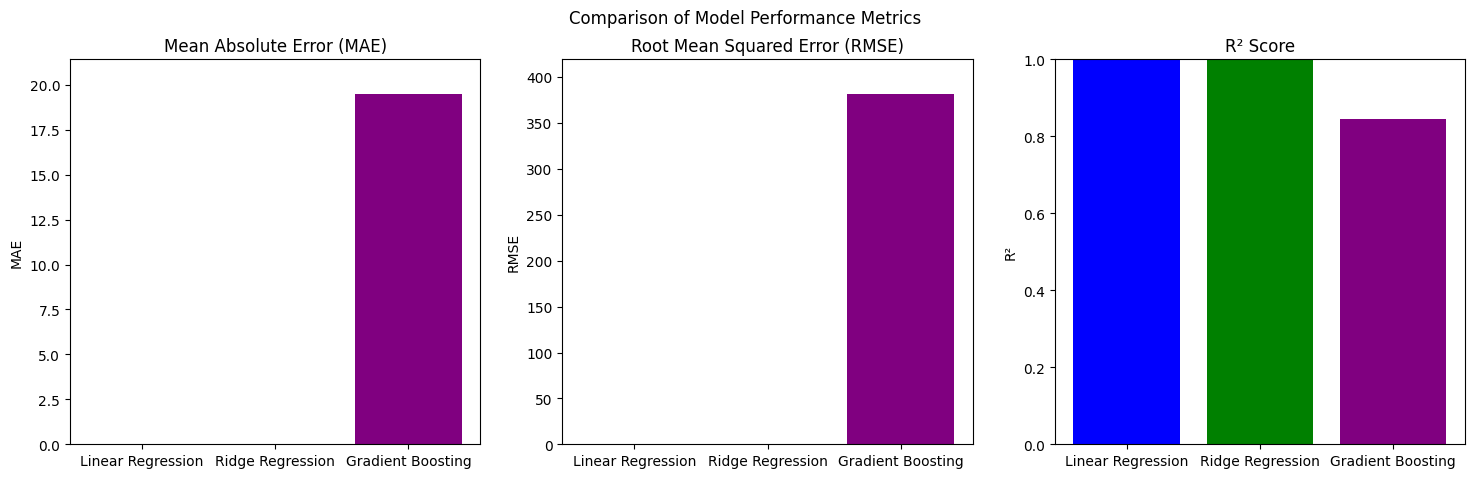

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming we have already calculated the metrics for each model:
# Mean Absolute Error (MAE)
mae_values = [mae_linear, mae_ridge, mae_gbm]
# Root Mean Squared Error (RMSE)
rmse_values = [rmse_linear, rmse_ridge, rmse_gbm]
# R-squared (R²)
r2_values = [r2_linear, r2_ridge, r2_gbm]

# Model names for labeling
models = ['Linear Regression', 'Ridge Regression', 'Gradient Boosting']

# Set up the figure and axes
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot Mean Absolute Error (MAE)
ax[0].bar(models, mae_values, color=['blue', 'green', 'purple'])
ax[0].set_title('Mean Absolute Error (MAE)')
ax[0].set_ylabel('MAE')
ax[0].set_ylim(0, max(mae_values) * 1.1)  # Adjust the y-axis to provide some padding

# Plot Root Mean Squared Error (RMSE)
ax[1].bar(models, rmse_values, color=['blue', 'green', 'purple'])
ax[1].set_title('Root Mean Squared Error (RMSE)')
ax[1].set_ylabel('RMSE')
ax[1].set_ylim(0, max(rmse_values) * 1.1)

# Plot R-squared (R²)
ax[2].bar(models, r2_values, color=['blue', 'green', 'purple'])
ax[2].set_title('R² Score')
ax[2].set_ylabel('R²')
ax[2].set_ylim(0, 1)  # R² values generally range from 0 to 1

# Display the plots
plt.suptitle('Comparison of Model Performance Metrics')
plt.show()
